# Image Captioning with Attention Prediction

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
tf.enable_eager_execution()

# from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from sklearn.utils import shuffle

# import re
import numpy as np
# import os
# import time
# import json
# from glob import glob
from PIL import Image
# import pickle
from DataDownloader.mscocodownloader import MSCocoDownloader
from Models.inceptionmodel import InceptionModel
from Utils.visualiser import Visualiser
from DatasetGeneration.datasetgeneratornolabels import DatasetGeneratorNoLabels
from DatasetGeneration.datasetgenerator import DatasetGenerator
from Models.attentionmodel import AttentionModel
from Models.Helpers.tokenisations import Tokenisations

In [3]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000
embedding_dim = 256
units = 512

attention_features_shape = 64

In [4]:
inmodel = InceptionModel()
tokenisations = Tokenisations(True)
vis = Visualiser()
attentionModel = AttentionModel(tokenisations, embedding_dim, units, len(tokenisations.tokenizer.word_index), BATCH_SIZE, attention_features_shape, inmodel.image_features_extract_model)
attentionModel.load_checkpoint()

Prediction Caption: a man on a surfboard riding a wave <end>


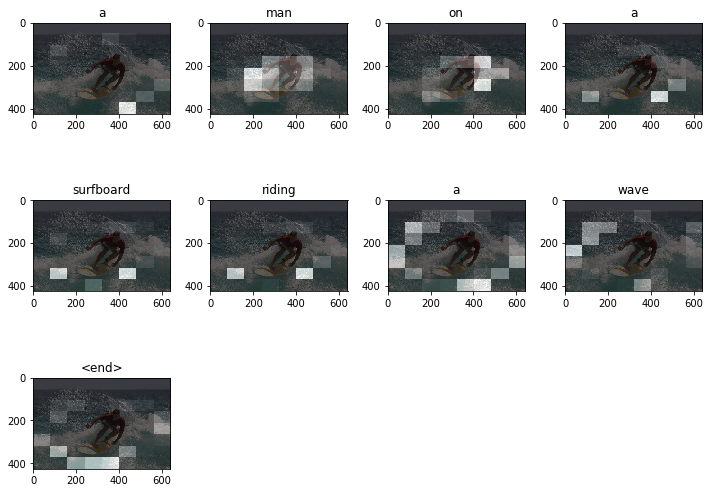

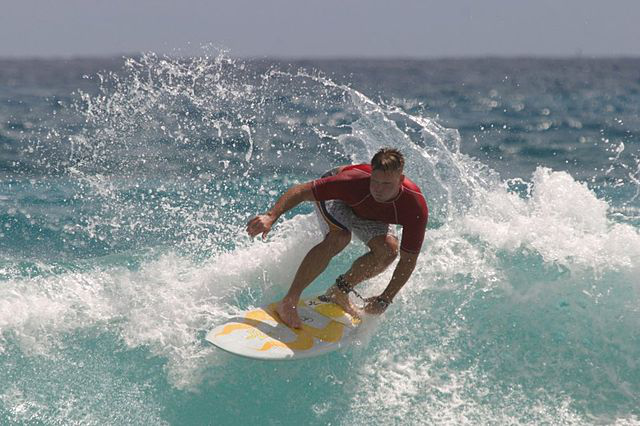

In [5]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_extension = image_url[-4:]
image_path = tf.keras.utils.get_file('image'+image_extension, 
                                     origin=image_url)

result, attention_plot = attentionModel.evaluate(image_path)
print ('Prediction Caption:', ' '.join(result))
vis.plot_attention(image_path, result, attention_plot)
# opening the image
Image.open(image_path)